## Imports

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import shutil
from pathlib import Path

## List files:

In [2]:
data_path = Path("../data/PetImages")
cat_files = list((data_path / "Cat").glob("*.jpg"))
dog_files = list((data_path / "Dog").glob("*.jpg"))

print(f"Cats: {len(cat_files)}")
print(f"Dogs: {len(dog_files)}")

Cats: 12500
Dogs: 12500


## Display a few images

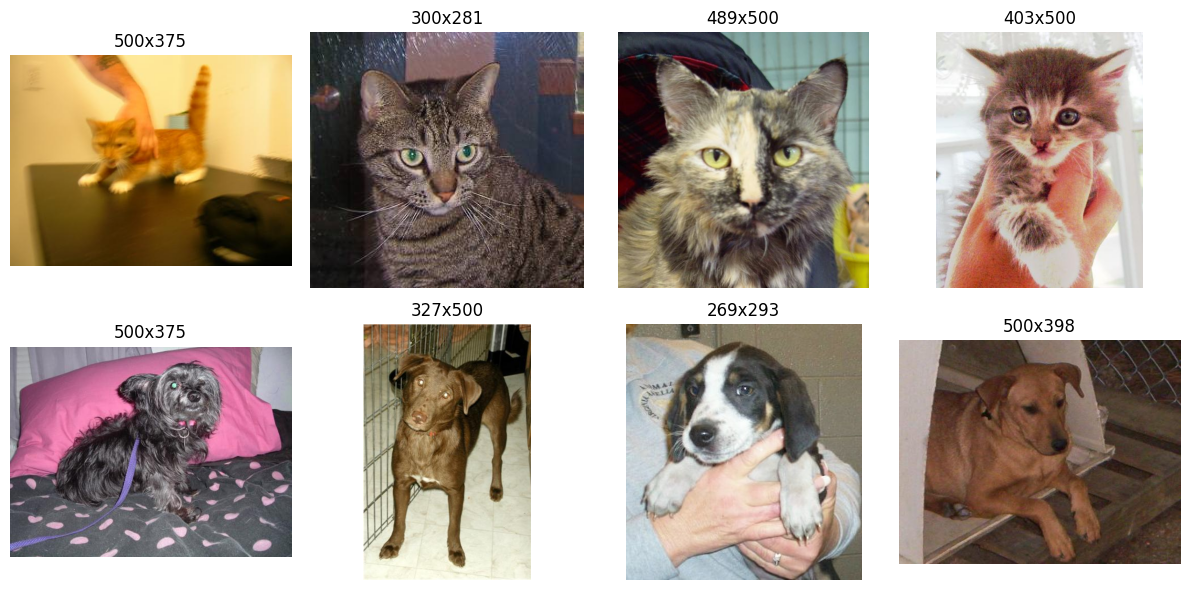

In [3]:
def load_rgb(path):
    """OpenCV loads BGR, convert to RGB for display"""
    img = cv2.imread(str(path))
    if img is None:
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show samples
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(4):
    img = load_rgb(cat_files[i])
    axes[0, i].imshow(img)
    axes[0, i].set_title(f"{img.shape[1]}x{img.shape[0]}")
    axes[0, i].axis('off')
for i in range(4):
    img = load_rgb(dog_files[i])
    axes[1, i].imshow(img)
    axes[1, i].set_title(f"{img.shape[1]}x{img.shape[0]}")
    axes[1, i].axis('off')
plt.tight_layout()

## corrupted files / image sizes

In [4]:
# Find corrupted images
bad = []
for f in cat_files + dog_files:
    if cv2.imread(str(f)) is None:
        bad.append(f)

print(f"Corrupted: {len(bad)}")
for p in bad:
    print(f"  {p.name}")

Corrupted: 3
  10404.jpg
  666.jpg
  11702.jpg


In [6]:
# Check size distribution
widths, heights = [], []
for f in (cat_files + dog_files)[:2000]:
    img = cv2.imread(str(f))
    if img is not None:
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

print(f"Width:  {min(widths)} - {max(widths)}, mean {np.mean(widths):.0f}")
print(f"Height: {min(heights)} - {max(heights)}, mean {np.mean(heights):.0f}")

Width:  50 - 500, mean 412
Height: 50 - 500, mean 357


In [ ]:
def check_image(path):
    try:
        img = cv2.imread(str(path))
        if img is None:
            return False, "failed to load"
        
        _ = img.sum()  # truncated files
        
        #size
        h, w = img.shape[:2]
        if h < 10 or w < 10:
            return False, f"too small: {w}x{h}"
        
        #channel check
        if len(img.shape) != 3 or img.shape[2] != 3:
            return False, f"not RGB: shape {img.shape}"
        
        return True, None
    except Exception as e:
        return False, str(e)


# check all images
all_files = cat_files + dog_files
problems = []

for i, f in enumerate(all_files):
    ok, err = check_image(f)
    if not ok:
        problems.append((f, err))

print(f"\n{len(problems)} bad images")
for p, e in problems:
    print(f"  {p.name}: {e}")


4 bad images
  10404.jpg: failed to load
  5673.jpg: too small: 4x4
  666.jpg: failed to load
  11702.jpg: failed to load


In [16]:
# find images where width or height is check for small images
tiny = []
for f in all_files:
    img = cv2.imread(str(f))
    if img is not None:
        h, w = img.shape[:2]
        if w < 100 or h < 100:
            tiny.append((f, w, h))

print(f"Found {len(tiny)} small images")

Found 180 small images


In [18]:
# copy to review folder to view them all there
review_dir = Path(r"C:\AWrk\cats_dogs_project\outputs\01_tiny_images")
review_dir.mkdir(parents=True, exist_ok=True)

for path, w, h in tiny:
    dst = review_dir / f"{w}x{h}_{path.name}"
    shutil.copy(path, dst)

print(f"Copied to {review_dir}")

Copied to C:\AWrk\cats_dogs_project\outputs\01_tiny_images


# Manually looking at the reduced size folder results:

50x39_10747 is a picture of a fence. There's a 4x4 useless picture. I found some flowers image and a yahoo mail image. Lots of unrelated images. Some of the images are cartoons and not real cats and dogs. There was an image that was fully white and had nothing inside it.